In [1]:
%reload_ext autoreload
%autoreload 2

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
import seaborn as sns

In [3]:
from markovsbi.bm.plot_utils import plot_metric_by_eval_steps, multi_plot, use_style
from markovsbi.bm.data_utils import query
from functools import partial

import matplotlib.pyplot as plt

In [4]:
DEFAULT_COLORS = {"nle": "#1e81b0", "nre": "#9bf2fa", "diffusion": "#f2a900", "npe": "#060169"}

COLORS_T = {2:  "#EEDF7A", 11:"#D8A25E", 101:"#A04747"}

col_size = 1.5
row_size = 1.3

In [5]:
query("../../results/bm_proposal")

,method,sampler,task,num_simulations,num_steps,seed,model_id,metric,value,eval_num_steps,time_train,time_eval,cfg
0,diffusion,em_gaus,simple1dstationary,10000,2,0,0,swd,0.054732,2,112.595347,0.321520,"{'name': 'bm_proposal', 'seed': 0, 'model_id':..."
1,diffusion,em_gaus,simple1dstationary,10000,2,0,0,swd,0.950733,11,112.595347,0.321520,"{'name': 'bm_proposal', 'seed': 0, 'model_id':..."
2,diffusion,em_gaus,simple1dstationary,10000,2,0,0,swd,0.871117,101,112.595347,0.321520,"{'name': 'bm_proposal', 'seed': 0, 'model_id':..."
3,diffusion,em_gaus,simple1dstationary,10000,2,0,0,c2st,0.502750,2,112.595347,2.641321,"{'name': 'bm_proposal', 'seed': 0, 'model_id':..."
4,diffusion,em_gaus,simple1dstationary,10000,2,0,0,c2st,0.789350,11,112.595347,2.641321,"{'name': 'bm_proposal', 'seed': 0, 'model_id':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,diffusion,em_gaus,simple10dstationary,10000,2,4,266,swd,1.482944,11,120.497347,0.288857,"{'name': 'bm_proposal', 'seed': 4, 'model_id':..."
1690,diffusion,em_gaus,simple10dstationary,10000,2,4,266,swd,1.774809,101,120.497347,0.288857,"{'name': 'bm_proposal', 'seed': 4, 'model_id':..."
1691,diffusion,em_gaus,simple10dstationary,10000,2,4,266,c2st,0.927600,2,120.497347,2.098485,"{'name': 'bm_proposal', 'seed': 4, 'model_id':..."
1692,diffusion,em_gaus,simple10dstationary,10000,2,4,266,c2st,0.999500,11,120.497347,2.098485,"{'name': 'bm_proposal', 'seed': 4, 'model_id':..."


(task=='simple10dstationary') & (metric=='swd')
(task=='mixture_rw_5d') & (metric=='swd')


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

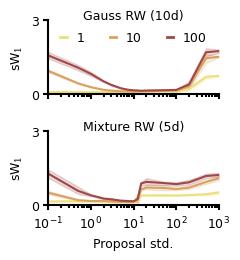

In [8]:


df = query("../../results/bm_proposal", task="simple10dstationary", metric="swd")
cfgs = df["cfg"]
df["proposal_var"] = cfgs.apply(lambda x: 10*float(eval(x)["task"]["params"]["sigma0_scale"]))

df2 =  query("../../results/bm_proposal_mixture", task="mixture_rw_5d", metric="swd")
cfgs = df2["cfg"]
df2["proposal_var"] = cfgs.apply(lambda x: float(eval(x)["task"]["params"]["sigma0"]))

with use_style("pyloric"):
    fig, axes = plt.subplots(2,figsize=(2.2, 2.4))
    
    l = sns.lineplot(x="proposal_var", y="value", hue="eval_num_steps", palette=sns.color_palette(COLORS_T, as_cmap=True), data=df, legend=False, ax = axes[0])
    sns.lineplot(x="proposal_var", y="value", hue="eval_num_steps", palette=sns.color_palette(COLORS_T, as_cmap=True), data=df2, legend=False, ax = axes[1])
    unique_labels = [2,11,101]
    handles = [plt.Line2D([0], [0], color=COLORS_T[unique_labels[i]], lw=2) for i in range(len(unique_labels))]

    axes[0].legend(
        handles, 
        [l -1 for l in unique_labels], 
        loc='upper center', 
        ncol=3,
        handlelength=0.5,
    )
    plt.subplots_adjust(hspace=0.5)
    # axes[0].text(
    # 0.5, 1.2,  # x, y position of the text (adjust as needed)
    # 'T=',
    # )
    # ax.set_ylim(0.45,1.)
    # ax.set_yticks([0.5,1.])
    # ax.set_yticklabels([0.5,1.])
    #ax.set_xticks([0.1, 2., 5. , ])

    axes[0].set_title("Gauss RW (10d)", y=0.9)
    axes[1].set_title("Mixture RW (5d)", y=0.9)
    for ax in axes:
        ax.set_xscale("log")
        ax.set_xlim([0.1, 1000.])
        ax.set_xlabel("Proposal std.")
        ax.set_ylabel(r"sW$_1$")
        ax.set_ylim([0.,3.])
        ax.set_yticks([0.,3.])
    axes[0].set_xlabel("")
        
    axes[0].set_xticklabels([])
    fig.savefig("proposal.svg")
    
plt.show()

(task=='simple10dstationary') & (metric=='c2st')
(task=='mixture_rw_5d') & (metric=='c2st')


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

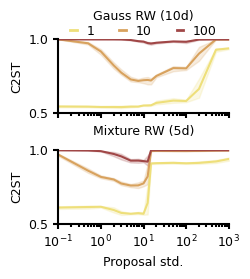

In [9]:


df = query("../../results/bm_proposal", task="simple10dstationary", metric="c2st")
cfgs = df["cfg"]
df["proposal_var"] = cfgs.apply(lambda x: 10*float(eval(x)["task"]["params"]["sigma0_scale"]))

df2 =  query("../../results/bm_proposal_mixture", task="mixture_rw_5d", metric="c2st")
cfgs = df2["cfg"]
df2["proposal_var"] = cfgs.apply(lambda x: float(eval(x)["task"]["params"]["sigma0"]))

with use_style("pyloric"):
    fig, axes = plt.subplots(2,figsize=(2.2, 2.4))
    l = sns.lineplot(x="proposal_var", y="value", hue="eval_num_steps", palette=sns.color_palette(COLORS_T, as_cmap=True), data=df, legend=False, ax = axes[0])
    sns.lineplot(x="proposal_var", y="value", hue="eval_num_steps", palette=sns.color_palette(COLORS_T, as_cmap=True), data=df2, legend=False, ax = axes[1])
    unique_labels = [2,11,101]
    handles = [plt.Line2D([0], [0], color=COLORS_T[unique_labels[i]], lw=2) for i in range(len(unique_labels))]

    axes[0].legend(
        handles, 
        [l -1 for l in unique_labels], 
        loc='upper center', 
        ncol=3,
        handlelength=0.5,
        bbox_to_anchor=[0.5,1.35]
    )
    plt.subplots_adjust(hspace=0.5)
    # axes[0].text(
    # 0.5, 1.2,  # x, y position of the text (adjust as needed)
    # 'T=',
    # )
    # ax.set_ylim(0.45,1.)
    # ax.set_yticks([0.5,1.])
    # ax.set_yticklabels([0.5,1.])
    #ax.set_xticks([0.1, 2., 5. , ])
    axes[0].set_xlabel("")
    axes[0].set_title("Gauss RW (10d)", y=1.15)
    axes[1].set_title("Mixture RW (5d)", y=1.1)
    for ax in axes:
        ax.set_xscale("log")
        ax.set_xlim([0.1, 1000.])
        ax.set_xlabel("Proposal std.")
        ax.set_ylabel("C2ST")
        ax.set_ylim([0.5,1.])
        ax.set_yticks([0.5,1.])
        
    axes[0].set_xlabel("")
    axes[0].set_xticklabels([])
    fig.savefig("proposal_c2st.svg")
    
plt.show()

In [18]:
df = query("../../results/bm_proposal", task="simple1dstationary", metric="c2st")
cfgs = df["cfg"]
df["proposal_var"] = cfgs.apply(lambda x: 10*float(eval(x)["task"]["params"]["sigma0_scale"]))

df1 = query("../../results/bm_proposal", task="simple2dstationary", metric="c2st")
cfgs = df1["cfg"]
df1["proposal_var"] = cfgs.apply(lambda x: 10*float(eval(x)["task"]["params"]["sigma0_scale"]))


df2 = query("../../results/bm_proposal", task="simple10dstationary", metric="c2st")
cfgs = df2["cfg"]
df2["proposal_var"] = cfgs.apply(lambda x: 10*float(eval(x)["task"]["params"]["sigma0_scale"]))

df3 =  query("../../results/bm_proposal_mixture", task="mixture_rw_2d", metric="c2st")
cfgs = df3["cfg"]
df3["proposal_var"] = cfgs.apply(lambda x: float(eval(x)["task"]["params"]["sigma0"]))

df4 =  query("../../results/bm_proposal_mixture", task="mixture_rw_5d", metric="c2st")
cfgs = df4["cfg"]
df4["proposal_var"] = cfgs.apply(lambda x: float(eval(x)["task"]["params"]["sigma0"]))

df5 = query("../../results/bm_proposal", task="simple1dstationary", metric="swd")
cfgs = df5["cfg"]
df5["proposal_var"] = cfgs.apply(lambda x: 10*float(eval(x)["task"]["params"]["sigma0_scale"]))

df6 = query("../../results/bm_proposal", task="simple2dstationary", metric="swd")
cfgs = df6["cfg"]
df6["proposal_var"] = cfgs.apply(lambda x: 10*float(eval(x)["task"]["params"]["sigma0_scale"]))


df7 = query("../../results/bm_proposal", task="simple10dstationary", metric="swd")
cfgs = df7["cfg"]
df7["proposal_var"] = cfgs.apply(lambda x: 10*float(eval(x)["task"]["params"]["sigma0_scale"]))

df8 =  query("../../results/bm_proposal_mixture", task="mixture_rw_2d", metric="swd")
cfgs = df8["cfg"]
df8["proposal_var"] = cfgs.apply(lambda x: float(eval(x)["task"]["params"]["sigma0"]))

df9 =  query("../../results/bm_proposal_mixture", task="mixture_rw_5d", metric="swd")
cfgs = df9["cfg"]
df9["proposal_var"] = cfgs.apply(lambda x: float(eval(x)["task"]["params"]["sigma0"]))

(task=='simple1dstationary') & (metric=='c2st')
(task=='simple2dstationary') & (metric=='c2st')
(task=='simple10dstationary') & (metric=='c2st')
(task=='mixture_rw_2d') & (metric=='c2st')
(task=='mixture_rw_5d') & (metric=='c2st')
(task=='simple1dstationary') & (metric=='swd')
(task=='simple2dstationary') & (metric=='swd')
(task=='simple10dstationary') & (metric=='swd')
(task=='mixture_rw_2d') & (metric=='swd')
(task=='mixture_rw_5d') & (metric=='swd')


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

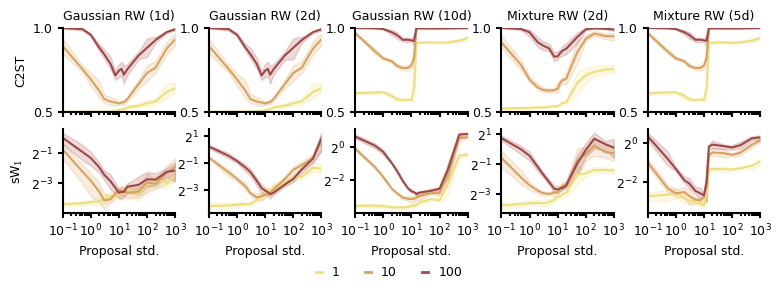

In [37]:

with use_style("pyloric"):
    fig, axes = plt.subplots(2,5,figsize=(9., 2.4))
    plt.subplots_adjust(wspace=0.3) 
    
    l = sns.lineplot(x="proposal_var", y="value", hue="eval_num_steps", palette=sns.color_palette(COLORS_T, as_cmap=True), data=df, legend=False, ax = axes[0,0])
    l = sns.lineplot(x="proposal_var", y="value", hue="eval_num_steps", palette=sns.color_palette(COLORS_T, as_cmap=True), data=df1, legend=False, ax = axes[0,1])
    l = sns.lineplot(x="proposal_var", y="value", hue="eval_num_steps", palette=sns.color_palette(COLORS_T, as_cmap=True), data=df2, legend=False, ax = axes[0,2])
    l = sns.lineplot(x="proposal_var", y="value", hue="eval_num_steps", palette=sns.color_palette(COLORS_T, as_cmap=True), data=df3, legend=False, ax = axes[0,3])
    l = sns.lineplot(x="proposal_var", y="value", hue="eval_num_steps", palette=sns.color_palette(COLORS_T, as_cmap=True), data=df4, legend=False, ax = axes[0,4])
    
    l = sns.lineplot(x="proposal_var", y="value", hue="eval_num_steps", palette=sns.color_palette(COLORS_T, as_cmap=True), data=df5, legend=False, ax = axes[1,0])
    l = sns.lineplot(x="proposal_var", y="value", hue="eval_num_steps", palette=sns.color_palette(COLORS_T, as_cmap=True), data=df6, legend=False, ax = axes[1,1])
    l = sns.lineplot(x="proposal_var", y="value", hue="eval_num_steps", palette=sns.color_palette(COLORS_T, as_cmap=True), data=df7, legend=False, ax = axes[1,2])
    l = sns.lineplot(x="proposal_var", y="value", hue="eval_num_steps", palette=sns.color_palette(COLORS_T, as_cmap=True), data=df8, legend=False, ax = axes[1,3])
    l = sns.lineplot(x="proposal_var", y="value", hue="eval_num_steps", palette=sns.color_palette(COLORS_T, as_cmap=True), data=df9, legend=False, ax = axes[1,4])
    
    axes[0,0].set_title("Gaussian RW (1d)")
    axes[0,1].set_title("Gaussian RW (2d)")
    axes[0,2].set_title("Gaussian RW (10d)")
    axes[0,3].set_title("Mixture RW (2d)")
    axes[0,4].set_title("Mixture RW (5d)")
    
    for i,ax in enumerate(axes[0]):
        ax.set_xscale("log")
        ax.set_xlim([0.1, 1000.])
        ax.set_xlabel("")
        ax.set_ylabel("C2ST")
        ax.set_ylim([0.5,1.])
        ax.set_yticks([0.5,1.])
        ax.set_xticklabels([])
        
        if i > 0:
            ax.set_ylabel("")
            #ax.set_yticklabels([])
            
    for i,ax in enumerate(axes[1]):
        ax.set_xscale("log")
        ax.set_yscale("log", base=2)
        ax.set_xlim([0.1, 1000.])
        ax.set_xlabel("Proposal std.")
        ax.set_ylabel(r"sW$_1$")
        
        if i > 0:
            ax.set_ylabel("")
            #ax.set_yticklabels([])
            
    handles = [plt.Line2D([0], [0], color=COLORS_T[unique_labels[i]], lw=2) for i in range(len(unique_labels))]
    legend = axes[1,0].legend(
        handles, 
        [l -1 for l in unique_labels], 
        loc='upper center', 
        ncol=3,
        handlelength=0.5,
        bbox_to_anchor=[2.9,-.5],
    )
    
    fig.savefig("appendix_proposal.svg")

    
    